In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error

import seaborn as sns

from sklearn.pipeline import make_pipeline

In [2]:
#dfd = pd.read_csv("CSVs\dfdd.csv")
#dfd.index = dfd['Unnamed: 0'].values
#del dfd['Unnamed: 0']

#dfc = pd.read_csv("CSVs\dfcc.csv")
#dfc.index = dfc['Unnamed: 0'].values
#del dfc['Unnamed: 0']

In [2]:
dfc = pd.read_csv('https://raw.githubusercontent.com/ZelshaR/Project/main/NoteBooks/CSVs/newdfc.csv')
dfc.index = dfc['Unnamed: 0'].values
del dfc['Unnamed: 0']

dfd = pd.read_csv('https://raw.githubusercontent.com/ZelshaR/Project/main/NoteBooks/CSVs/newdfd.csv')
dfd.index = dfd['Unnamed: 0'].values
del dfd['Unnamed: 0']

dfdsr = pd.read_csv('https://raw.githubusercontent.com/ZelshaR/Project/main/NoteBooks/CSVs/newdfdsr.csv')
dfdsr.index = dfdsr['Unnamed: 0'].values
del dfdsr['Unnamed: 0']

dfcsr = pd.read_csv('https://raw.githubusercontent.com/ZelshaR/Project/main/NoteBooks/CSVs/newdfcsr.csv')
dfcsr.index = dfcsr['Unnamed: 0'].values
del dfcsr['Unnamed: 0']

In [4]:
#corlist = dfc.columns
#dfcsr = dfc.copy(deep=True)
#dfdsr = dfd.copy(deep=True)
#for i in corlist:
#    for j in range(706):
#        dfcsr[i].iloc[j] = (dfcsr[i].iloc[j]-min(dfcsr[i]))/(max(dfcsr[i])-min(dfcsr[i]))
#for i in corlist:
#    for j in range(706):
#        dfdsr[i].iloc[j] = (dfdsr[i].iloc[j]-min(dfdsr[i]))/(max(dfdsr[i])-min(dfdsr[i]))

In [6]:
#dfcsr.drop(dfcsr.head(10).index,inplace=True)
#dfcsr.drop(dfcsr.tail(10).index,inplace=True)

In [78]:
#xaxis = np.array(range(1,3531))

In [61]:
a = np.concatenate((dfcsr['United Kingdom'].values, dfcsr['Georgia'].values, dfcsr['Belarus'].values, dfcsr['Lithuania'].values, dfcsr['Europe'].values), axis = 0)
#yaxis = a.reshape(6,706)

In [7]:
yaxis = dfcsr['Russia'].values
xaxis = [i for i in range(1,len(dfcsr) + 1)]

In [72]:
#lol

array([[   1,    2,    3, ...,  704,  705,  706],
       [ 707,  708,  709, ..., 1410, 1411, 1412],
       [1413, 1414, 1415, ..., 2116, 2117, 2118],
       [2119, 2120, 2121, ..., 2822, 2823, 2824],
       [2825, 2826, 2827, ..., 3528, 3529, 3530]])

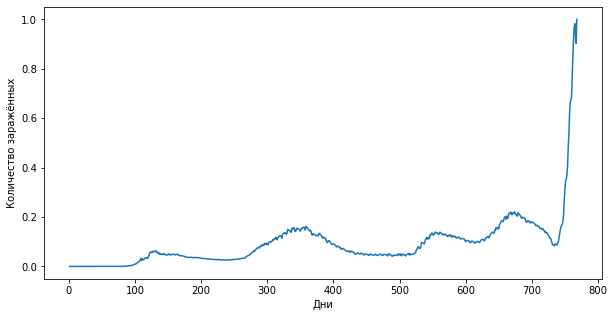

In [8]:
plt.figure(figsize=(10,5))
plt.plot(xaxis, yaxis)
plt.xlabel('Дни')
plt.ylabel('Количество заражённых')
plt.show()

In [9]:
xaxis1 = np.reshape(xaxis, (-1, 1))
lr.fit(xaxis1, yaxis)

LinearRegression()

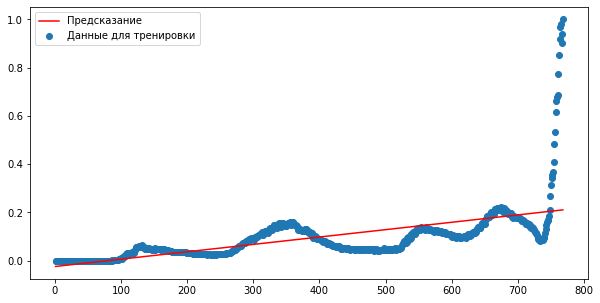

In [10]:
plt.figure(figsize=(10,5))
plt.scatter(xaxis, yaxis, label='Данные для тренировки')
plt.plot(xaxis,lr.predict(xaxis1), label='Предсказание', c='red')
plt.legend()
plt.show()

In [81]:
xaxis_

array([[  1.],
       [  2.],
       [  3.],
       [  4.],
       [  5.],
       [  6.],
       [  7.],
       [  8.],
       [  9.],
       [ 10.],
       [ 11.],
       [ 12.],
       [ 13.],
       [ 14.],
       [ 15.],
       [ 16.],
       [ 17.],
       [ 18.],
       [ 19.],
       [ 20.],
       [ 21.],
       [ 22.],
       [ 23.],
       [ 24.],
       [ 25.],
       [ 26.],
       [ 27.],
       [ 28.],
       [ 29.],
       [ 30.],
       [ 31.],
       [ 32.],
       [ 33.],
       [ 34.],
       [ 35.],
       [ 36.],
       [ 37.],
       [ 38.],
       [ 39.],
       [ 40.],
       [ 41.],
       [ 42.],
       [ 43.],
       [ 44.],
       [ 45.],
       [ 46.],
       [ 47.],
       [ 48.],
       [ 49.],
       [ 50.],
       [ 51.],
       [ 52.],
       [ 53.],
       [ 54.],
       [ 55.],
       [ 56.],
       [ 57.],
       [ 58.],
       [ 59.],
       [ 60.],
       [ 61.],
       [ 62.],
       [ 63.],
       [ 64.],
       [ 65.],
       [ 66.],
       [ 6

In [12]:
g = np.reshape(dfcsr.index, (-1, 1))

In [120]:
cd.index

Index(['United Kingdom', 'Belarus', 'Georgia', 'Europe', 'nu'], dtype='object')

In [125]:
dfcsr[['Russia', 'United Kingdom', 'Belarus', 'Georgia', 'Europe']]

,Russia,United Kingdom,Belarus,Georgia,Europe
1,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...
703,0.805123,0.609661,0.883166,0.636276,0.728092
704,0.796145,0.635866,0.837864,0.549291,0.586795
705,0.785103,0.758828,0.625656,0.286405,0.677106
706,0.759662,0.666838,0.482594,0.726321,1.000000


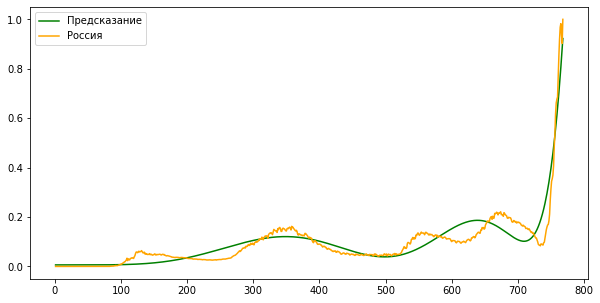

[[ 0.00000000e+00 -3.67312544e-18 -2.89431712e-21  4.84622230e-22
   1.13705215e-19  2.08858943e-17  2.33360378e-15 -1.56779229e-17
   3.91995877e-20 -4.31781295e-23  1.76763377e-26]]
[0.00617898]


[0.0407636728158216]

In [27]:
rmses = []
#enumerate = [i for i in range(10)]
enumerate = [10]

for i in enumerate:
    p = PolynomialFeatures(i, include_bias=True)
    
    xaxis_poly = p.fit_transform(g)

    lr.fit(xaxis_poly, dfcsr[['Russia']])

    xaxis_ = np.linspace(g.min(0), g.max(0), 768).reshape(768,1)
    y_pred_lr = lr.predict(p.transform(xaxis_))
    poly_mse = mean_squared_error(dfcsr[['Russia']], y_pred_lr)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    plt.figure(figsize=(10,5))
#    plt.scatter(xaxis, yaxis, label='Данные для тренировки') #не вижу смысла проставлять точки, ибо они просто будут накладываться на кривую
    plt.plot(xaxis, y_pred_lr, label='Предсказание', c='green')
    plt.plot(xaxis, yaxis, label='Россия', c='orange')
#    plt.plot(xaxis, dfcsr['United Kingdom'].values, label='Англия', c='red')
#    plt.plot
#    plt.plot
#    plt.plot
#    plt.plot
    plt.legend()
    plt.show()
    #print(p.fit_transform(xaxis_))
    modelo = make_pipeline(p, lr)
    print(modelo.steps[1][1].coef_)
    print(modelo.steps[1][1].intercept_)
rmses

In [35]:
print(modelo)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=10)),
                ('linearregression', LinearRegression())])


In [34]:
x = 750
a = 0
for i in range (1,11):
    a = ((x ** (i)) * modelo.steps[1][1].coef_[0, i]) + a 
a = a + modelo.steps[1][1].intercept_
print(a)

[0.37777275]


In [84]:
a = 
a = a * (max(dfc['Russia']) - min(dfc['Russia'])) + min(dfc['Russia'])
print(a)

40661.825859019336


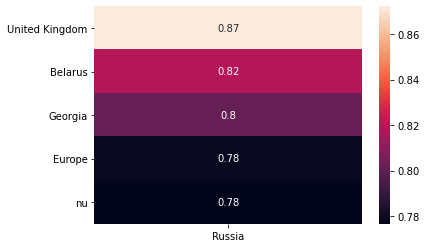

In [118]:
lisc = list(dfcsr.columns)
inp='Russia' #Afghanistan
inpcol=lisc.index(inp)
c = dfcsr.corr()
cd=c.iloc[:,[inpcol]]
cd=cd.sort_values(by=inp,ascending=False)
cd=cd[1:6]
sns.heatmap(cd,annot=True) # vmin=0,vmax=1
plt.show()

In [95]:
cd

,Russia
United Kingdom,0.867595
Belarus,0.824757
Georgia,0.817048
Europe,0.796663
Lithuania,0.795159


In [22]:
y = dfcsr['Russia'].values
Val = [dfcsr['United Kingdom'].values, dfcsr['Georgia'].values, dfcsr['Belarus'].values, dfcsr['Lithuania'].values, dfcsr['Europe'].values]

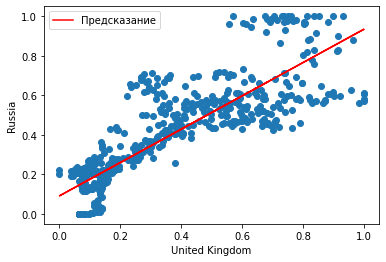

In [23]:
for i in range(1):
    x1p = np.reshape(Val[i], (-1, 1))
    lr.fit(x1p, y)
    plt.scatter(Val[i], y)
    plt.plot(x1p,lr.predict(x1p), label='Предсказание', c='red')
    plt.xlabel(cd.index[i])
    plt.ylabel('Russia')
    plt.legend()
    plt.show()

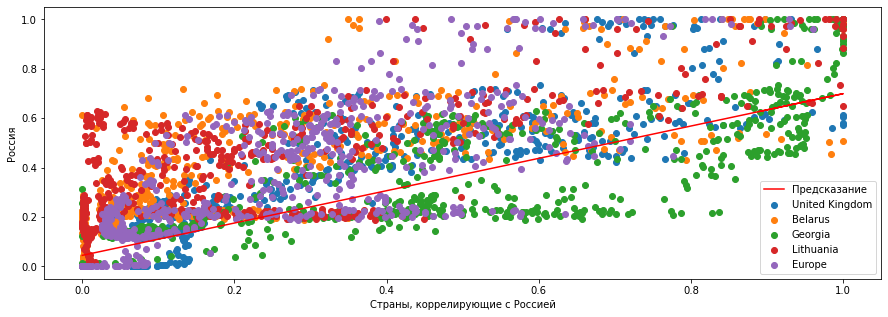

[0.65438083]
0.04484303154646535


In [121]:
x1p = np.reshape(Val[2], (-1, 1))
lr.fit(x1p, y)
plt.figure(figsize=(15,5))
plt.scatter(Val[0], y, label=cd.index[0])
plt.scatter(Val[1], y, label=cd.index[1])
plt.scatter(Val[2], y, label=cd.index[2])
plt.scatter(Val[3], y, label=cd.index[3])
plt.scatter(Val[4], y, label=cd.index[4])
plt.plot(x1p,lr.predict(x1p), label='Предсказание', c='red')
plt.xlabel('Страны, коррелирующие с Россией')
plt.ylabel('Россия')
plt.legend()
plt.show()
print(modelo.steps[1][1].coef_)
print(modelo.steps[1][1].intercept_)

In [119]:
x = 1
a = modelo.steps[1][1].intercept_ + modelo.steps[1][1].coef_ * x
print(a)

[0.69922386]


In [118]:
a = a * (max(dfc['Russia']) - min(dfc['Russia'])) + min(dfc['Russia'])
print(a)

[18604848.87304747]


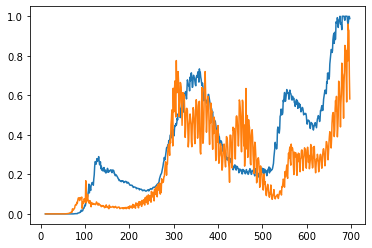

In [25]:
plt.plot(dfcsr['Russia'])
plt.plot(dfcsr['Europe'])
plt.show()

In [97]:
#xaxiss = np.reshape(xaxis, (-1, 1))
model = lr.fit(np.reshape(dfcsr.index, (-1, 1)), dfcsr[['Russia', 'United Kingdom']])

In [88]:
r_sq = model.score(xaxiss, a.reshape(706,5))
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.018417095498703007
intercept: [0.19477753 0.19374956 0.19098423 0.1950648  0.19272552]
slope: [[0.00017815]
 [0.00017999]
 [0.00018726]
 [0.00017863]
 [0.00018255]]


In [90]:
y_pred = model.predict(xaxiss)
print('predicted response:', y_pred, sep='\n')

predicted response:
[[0.19495567 0.19392955 0.19117148 0.19524344 0.19290807]
 [0.19513382 0.19410955 0.19135874 0.19542207 0.19309063]
 [0.19531197 0.19428954 0.191546   0.1956007  0.19327318]
 ...
 [0.32019391 0.32046602 0.32281395 0.32082187 0.32124248]
 [0.32037206 0.32064601 0.32300121 0.3210005  0.32142504]
 [0.32055021 0.32082601 0.32318847 0.32117913 0.32160759]]


In [92]:
y_pred = model.intercept_ + np.sum(model.coef_ * xaxiss, axis=1)

ValueError: operands could not be broadcast together with shapes (5,1) (706,1) 